# Titanic - Experiment 09

### 1. Exploratory Data Analysis 
 1. Analyze feature statistics
 2. Identify relationships and/or trends
### 2. Feature Engineering and Data Cleaning
 1. Add features
 2. Remove features
 3. Transform features
### 3. Modeling

Since the target variable is a label of either survived (1) or died (0), we need a binary classification model to help us identify which passengers survived or died the Titanic disaster.

In [1]:
# Import libraries
import os
import sys

import scipy
import numpy as np
import pandas as pd

from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from IPython.core.interactiveshell import InteractiveShell

if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())
from Titanic.Code.DataPrep.titanic import Titanic
from Titanic.Code.DataPrep.helpers import score_impute_strategies

warnings.filterwarnings('ignore')
np.random.seed(17)
InteractiveShell.ast_node_interactivity = "all"
plt.style.use('fivethirtyeight')
%matplotlib inline

## 1. Exploratory Data Analysis
 1. Analyze feature statistics
 2. Identify relationships and/or trends

(891, 11)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

{'PassengerId': numpy.int32,
 'Survived': numpy.int32,
 'Pclass': numpy.int32,
 'Name': str,
 'Sex': CategoricalDtype(categories=['male', 'female'], ordered=None),
 'Age': numpy.float64,
 'SibSp': numpy.int32,
 'Parch': numpy.int32,
 'Ticket': str,
 'Fare': numpy.float64,
 'Cabin': str,
 'Embarked': CategoricalDtype(categories=['C', 'Q', 'S'], ordered=None)}

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


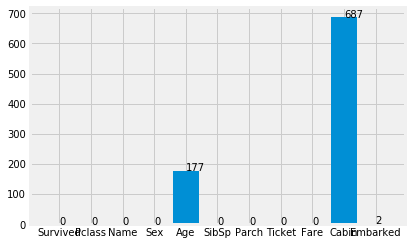

In [2]:
# Make training Titanic object
titanic = Titanic(name='train')

# Read training data
titanic.get_data()

# Print surface-level details about data
titanic.data.shape
titanic.data.columns
titanic.dtypes_
titanic.data.head()
titanic.plot_missing_data()

 * Our data has 11 columns and 891 rows (passengers).
 * **Age** contains 19.8% nulls.
 * **Cabin** contains 77.1% nulls.
 * **Embarked** contains 0.224% nulls.
 * **Name** has the title (Mr, Mrs, Miss, etc.) of the passenger.
 * **Ticket** looks like it does not contain any information of value.

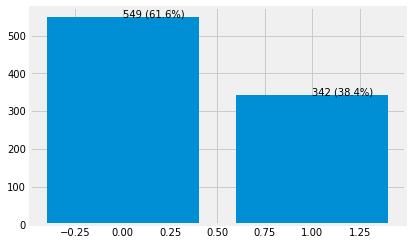

In [3]:
titanic.plot_value_counts(column='Survived')

 * A majority (61.6%) of passengers aboard the Titanic did not survive.

### 1.1 Analyze feature statistics
 1. Sex
 2. Pclass
 3. Age
 4. Name
 5. SibSp
 6. Parch
 7. Fare
 8. Embarked
 9. Cabin
 10. Ticket

#### 1.1.1 Sex

,Sex,Survived
0,male,0.188908
1,female,0.742038


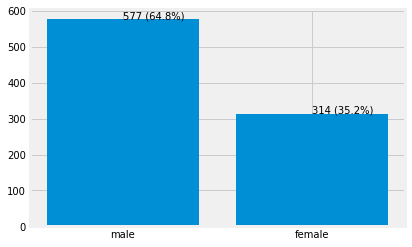

In [4]:
titanic.get_target_correlation('Sex')
titanic.plot_value_counts('Sex')

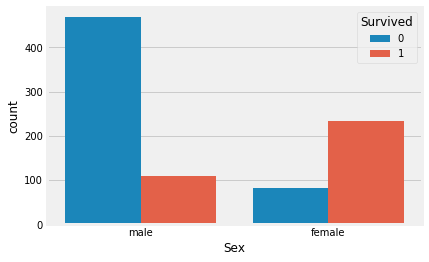

In [5]:
sns.countplot('Sex', hue='Survived', data=titanic.data)

In [6]:
pd.crosstab(
    titanic.data['Sex'],
    titanic.data['Survived'],
    normalize=True,
    margins=True
).style.background_gradient(
    cmap='Pastel1'
)
pd.crosstab(
    titanic.data['Sex'],
    titanic.data['Survived']
).style.background_gradient(
    cmap='Pastel1'
)

Survived,0,1,All
Sex,,,
male,0.525253,0.122334,0.647587
female,0.0909091,0.261504,0.352413
All,0.616162,0.383838,1


Survived,0,1
Sex,,
male,468,109
female,81,233


 * 'Ticket' is an almost random mix of alphanumeric characters and no valuable pattern was found.
 * 'Cabin' has over 20% of it's values missing and imputation or record removal would add bias to our final model.

#### 1.1.2 Pclass

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


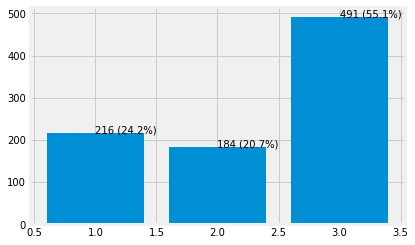

In [7]:
titanic.get_target_correlation('Pclass')
titanic.plot_value_counts('Pclass')

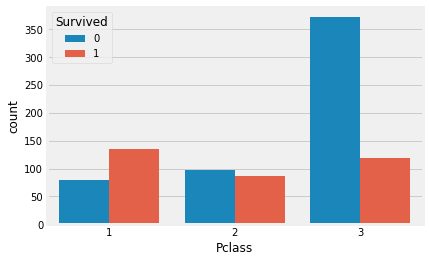

In [8]:
sns.countplot('Pclass', hue='Survived', data=titanic.data)

In [9]:
pd.crosstab(
    titanic.data['Pclass'],
    titanic.data['Survived'],
    normalize=True,
    margins=True
).style.background_gradient(
    cmap='Pastel1'
)
pd.crosstab(
    titanic.data['Pclass'],
    titanic.data['Survived']
).style.background_gradient(
    cmap='Pastel1'
)

Survived,0,1,All
Pclass,,,
1,0.0897868,0.152637,0.242424
2,0.108866,0.0976431,0.20651
3,0.417508,0.133558,0.551066
All,0.616162,0.383838,1


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [10]:
pd.crosstab(
    [titanic.data['Sex'], titanic.data['Survived']],
    titanic.data['Pclass'],
    normalize=True,
    margins=True
).style.background_gradient(
    cmap='Pastel1'
)
pd.crosstab(
    [titanic.data['Sex'], titanic.data['Survived']],
    titanic.data['Pclass']
).style.background_gradient(
    cmap='Pastel1'
)

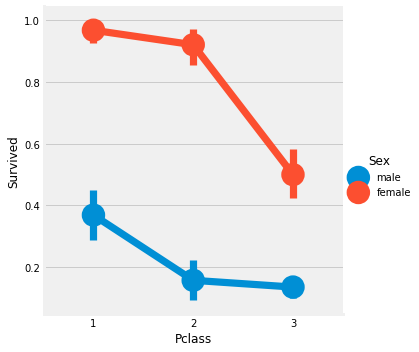

In [11]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=titanic.data)

#### 1.1.3 Age

#### 1.1.4 Name

#### 1.1.5 SibSp

#### 1.1.6 Parch

#### 1.1.7 Fare

#### 1.1.8 Embarked

#### 1.1.9 Cabin

#### 1.1.10 Ticket

## 2. Feature Engineering and Data Cleaning
 1. Add features
 2. Remove features
 3. Transform features

## 3. Modeling